<a id='top'></a>

# Core Information Spread Measurements (Multi-Platform Measurements)

<br>

 <center> <img src=img/multi_platform.png  width=75%> </center>  

#### Goal: Demonstrate the SocialSim multi-platform measurements
 
### <a href='#intro'> 1) Intro to measuring core properties of information spread</a>
 
### <a href='#data'> 2) Imports and data loading</a>

### <a href='#meas'> 3) Measuring properties of information spread</a>

### <a href='#bonus'> 6) Bonus Exercise </a>

<a id='intro'></a>

### Information Spread Dimensions
[Jump to top](#top)

We define four key dimensions of information spread:
1. **Shares**: The total number of spread actions for a specific piece of information
2. **Audience**: The total number of users who spread the information
3. **Lifetime**: How long the spreading activity continues for
4. **Speed**: How quickly the number of shares grows over time


If we want to study the propagation of given piece of information, we can look at the share events that are related to that piece of information.

<img src="img/info_spread_measures.png?1" width="800"/>


However, these measures alone obviously don't tell the whole story. For example, we often care about how the information spread is varying over time.

<img src="img/info_spread_measures_over_time.png?1" width="800"/>

We are also interested in studying multiple units of information propagating within the same population. For example, a set of hashtags related to an ongoing event.

<img src="img/info_population.png?1" width="800"/>

In this case, we can study the distribution of information spread quantities or their average values across populations or sub-groups (communities).

<img src="img/group_scale.png?1" width="800"/>
<img src="img/group_scale_temporal.png?1" width="800"/>

Therefore, we can probe many different dimensions of the information spread by combining these different factors:
1. Information spread measure (shares, audience, lifetime, speed)
2. Temporal granularity (Batch vs. temporal)
3. Group granularity (node vs. community vs. population)

<img src="img/measurement_dimensions.png" width="800"/>

<a id='data'></a>

### Imports
[Jump to top](#top)

In [4]:
#run this twice to avoid warnings
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [5]:
import socialsim as ss
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

### Load the dataset
[Jump to top](#top)

We will use a small sample of Twitter, Reddit, and GitHub data related to cybersecurity and software vulnerabilities.  We are interested in looking at the propagation of specific cybersecurity keywords including malware names and related keywords and software vulnerability identification numbers (CVE numbers). These include:

1. NotPetya
<img src="img/notpetya.png" width="800"/>
2. Crashoverride
<img src="img/crashoverride.png" width="800"/>
3. PlugX
<img src="img/plugx.png" width="800"/>

In [6]:
#load in the data sample
#this file contains all events related to the selected units of information
dataset_path = '../data/tutorial_multi-platform.json'
dataset = ss.load_data(dataset_path, verbose=False)

dataset.head()

,actionType,informationID,nodeID,nodeTime,nodeUserID,parentID,platform,rootID
0,comment,CVE-2015-0235,t1_UBnpUeExy8l8Ts15cUTK4A,2015-01-27 15:43:09,P7SQfkQ60HExK4I9wMpwJQ,t3_bamrHv295san9QYMHe4HRA,reddit,t3_bamrHv295san9QYMHe4HRA
1,comment,CVE-2015-0235,t1_1dG_RYXvJ1_wflBMStRHOw,2015-01-27 15:53:28,XhzvIortyMKYITjBiCqmZQ,t3_bamrHv295san9QYMHe4HRA,reddit,t3_bamrHv295san9QYMHe4HRA
2,comment,CVE-2015-0235,t1_LlMHi1BaWxkSEPofeIteVA,2015-01-27 15:55:31,toUHhZWnzuvr-Zy8O7qqRw,t3_O7OxkRlALDGwADQvTkoL0A,reddit,t3_O7OxkRlALDGwADQvTkoL0A
3,comment,CVE-2015-0235,t1_ltv9NHc4lw8tnwtzE_GoCw,2015-01-27 15:58:05,toUHhZWnzuvr-Zy8O7qqRw,t3_bamrHv295san9QYMHe4HRA,reddit,t3_bamrHv295san9QYMHe4HRA
4,post,CVE-2015-0235,t3_2XgCMRipYHiue2-REQDsVQ,2015-01-27 16:04:56,mjvNtfY0ZEUZZuGQKptQ3A,t3_2XgCMRipYHiue2-REQDsVQ,reddit,t3_2XgCMRipYHiue2-REQDsVQ


### Metadata
[Jump to top](#top)

The dataset we loaded above contains only user action related information (e.g. tweets, posts, comments, etc.).  Sometimes, we may require additional contextual information, such as user properties or information properties that are not specific to each event. In that case, we leverage a seperate metadata input to store this information.

In this example, we will define several *communities* of interest, by which we mean groups of information units that are related to each other.  We want to study whether these different types of information propagate differently in the social networks. We will create communities for:
1. Vulnerability IDs (CVEs)
2. Malware keywords

In [7]:
metadata = ss.MetaData(communities = {'CVEs':['CVE-2015-0235', 
                                              'CVE-2015-3864', 
                                              'CVE-2016-0777', 
                                              'CVE-2015-1805',
                                              'CVE-2016-10033',
                                              'CVE-2015-6620',
                                              'CVE-2017-0199', 
                                              'CVE-2017-8295', 
                                              'CVE-2017-0037',
                                              'CVE-2017-0059'],
                                      'Malware':['notpetya', 
                                                 'vbs', 
                                                 'nmap', 
                                                 'crashoveride', 
                                                 'plugx',
                                                 'industroyer']})


### Instantiate measurement object
[Jump to top](#top)

We will first create the measurement object that will allow us to access different measurements and apply them to the data we have loaded.

**Note**: This class for this measurement type is named "MultiPlatform" because it aggregates all events from multiple platforms to calculate the total shares and audience, rather than treating each platform seperately as some of the other meausurement types do.

In [8]:
measurements = ss.MultiPlatformMeasurements(dataset,metadata=metadata)

Now that we have instantiated the object, we have many available measurements that we can run.

In [9]:
measurements.list_measurements()

1) distribution_of_shares: Determine the distribution of the amount of shares of information
2) distribution_of_speed: Calculate the distributions of the varying speeds of the information
3) distribution_of_users: Determine the distribution of the number of users reached
4) lifetime_of_info: Calculate the lifetime of the pieces of information
5) lifetime_of_info_distribution: Calculate the lifetime of the pieces of information
6) lifetime_of_threads: Calculate the lifetime of shares/interactions with the initial shares (roots) of infoIDs
7) number_of_shares: Determine the number of times a piece of information is shared
8) number_of_shares_over_time: Determine the number of times a piece of information is shared over time
9) speed_of_info: Determine the speed at which each piece of information is spreading
10) speed_of_info_over_time: Determine the speed of information over time
11) top_audience_reach: Determine the top K pieces of information with the largest audience reach.
12) top_i

We can find out more information about the available measurements.

In [10]:
help(measurements.number_of_shares)

Help on method number_of_shares in module socialsim.measurements.multi_platform:

number_of_shares(node_level=False, community_level=False, nodes=[], communities=[], platform='all') method of socialsim.measurements.multi_platform.MultiPlatformMeasurements instance
    Measurement: number_of_shares (population_number_of_shares, community_number_of_shares, node_number of shares)
    
    Description: Determine the number of times a piece of information is shared
    
    Input:
        node_level: If true, compute measurement for each node
        community_level: If true, compute measurement for each community
        nodes: List of specific nodes to calculate measurement, or keyword "all" to calculate on all nodes, or
                empty list (default) to calculate nodes provided in metadata if node_level is true
        communities: List of specific communities, keyword "all" or empty list (default) to use communities
                provided from metadata if community_level is true

<a id='meas'></a>

### Scalar measurements
[Jump to top](#top)

We can start by getting a feel for the total audience that is typically reached by information units in our dataset.

In [11]:
print('Average audience size = {}'.format(measurements.unique_users()))

Average audience size = 1241.5


However, we expect there might be a lot of variation among the different pieces of information. So, we can seperately extract the individual values.

In [12]:
print('Audience size for each unit of information:')
measurements.unique_users(node_level=True)

Audience size for each unit of information:


{'CVE-2015-0235': 1230,
 'CVE-2015-1805': 2457,
 'CVE-2015-3864': 485,
 'CVE-2015-6620': 90,
 'CVE-2016-0777': 923,
 'CVE-2016-10033': 12459,
 'CVE-2017-0037': 56,
 'CVE-2017-0059': 56,
 'CVE-2017-0199': 25,
 'CVE-2017-8295': 160,
 'crashoverride': 670,
 'industroyer': 218,
 'nmap': 73,
 'notpetya': 926,
 'plugx': 1,
 'vbs': 35}

And if we want to leverage the community information that we defined earlier, we can calculate the average number of shares for each piece of information for information of different types.

In [13]:
print('Average audience size for each community:')
measurements.unique_users(community_level=True)

Average audience size for each community:


{'CVEs': 1794.1, 'Malware': 250.6}

### Ranked List Measurements

We may not be interested in the exact audience sizes in our data, but instead we want to identify the pieces of information that reach the largest audience. We can apply the ranked list measurements to study this.

In [14]:
measurements.top_audience_reach(k=3)

,informationID,value
5,CVE-2016-10033,12459
1,CVE-2015-1805,2457
0,CVE-2015-0235,1230


In [15]:
meas = measurements.top_audience_reach(k=3,community_level=True)
for k,val in meas.items():
    print('{}: Information Units with Largest Audience'.format(k))
    print(val)
    print('')

CVEs: Information Units with Largest Audience
    informationID  value
0  CVE-2016-10033  12459
1   CVE-2015-1805   2457
2   CVE-2015-0235   1230

Malware: Information Units with Largest Audience
  informationID  value
0      notpetya    926
1   industroyer    218
2          nmap     73



### Distribution Measurements

To get a more detailed picture of our population of information units, we can explore the distributions of the core information spread quantities.

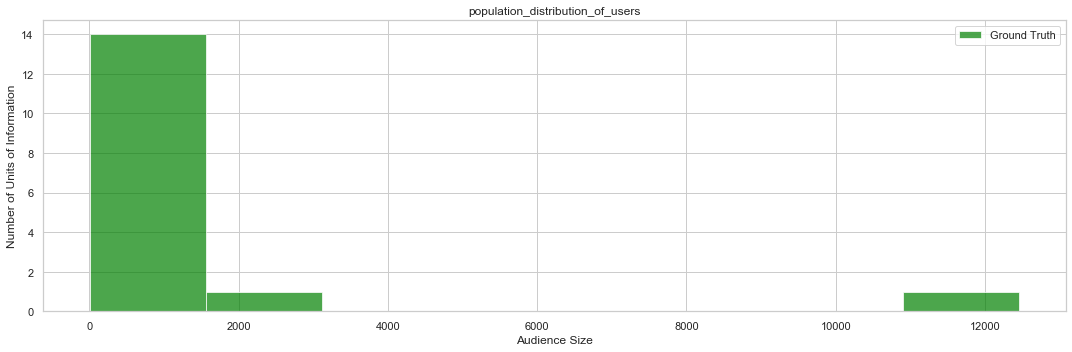

In [16]:
audience_distribution = measurements.distribution_of_users()

#provide the measurement name to the generate_plot function so it knows what type of plot to produce
ss.generate_plot(
    audience_distribution, 
    measurement_name='population_distribution_of_users',
    show=True
    )


### Temporal Measurements

And we can look at how these quantities are changing over time.

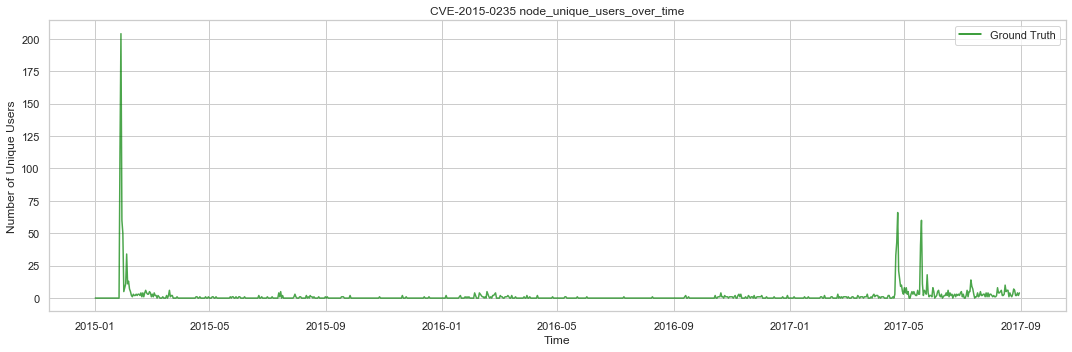

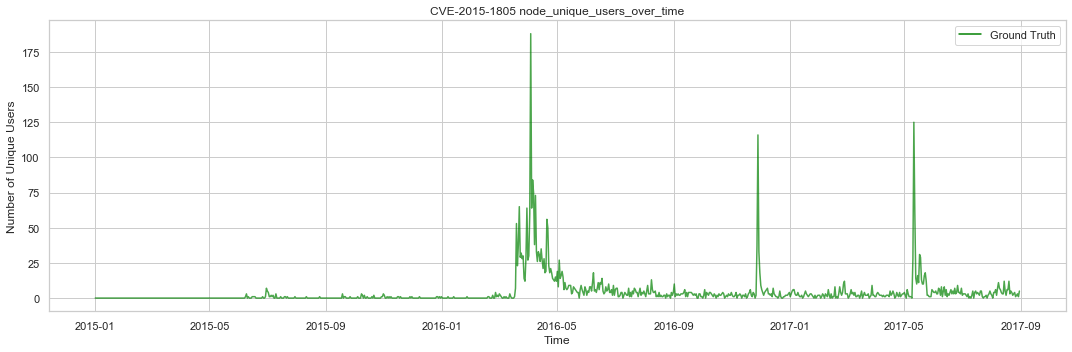

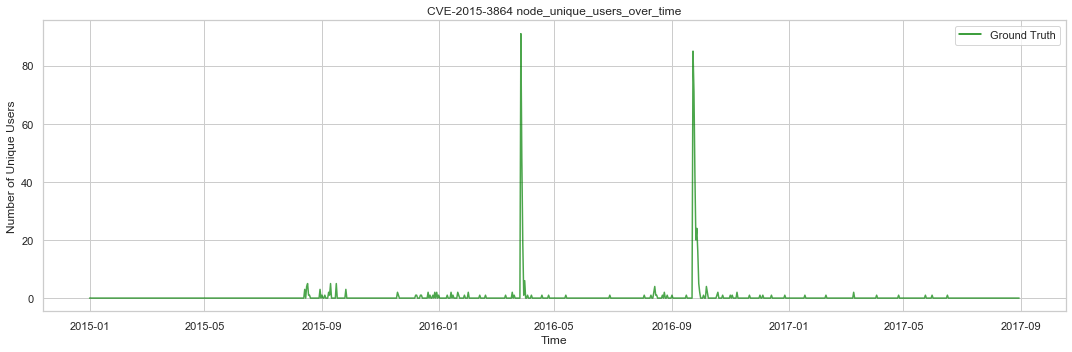

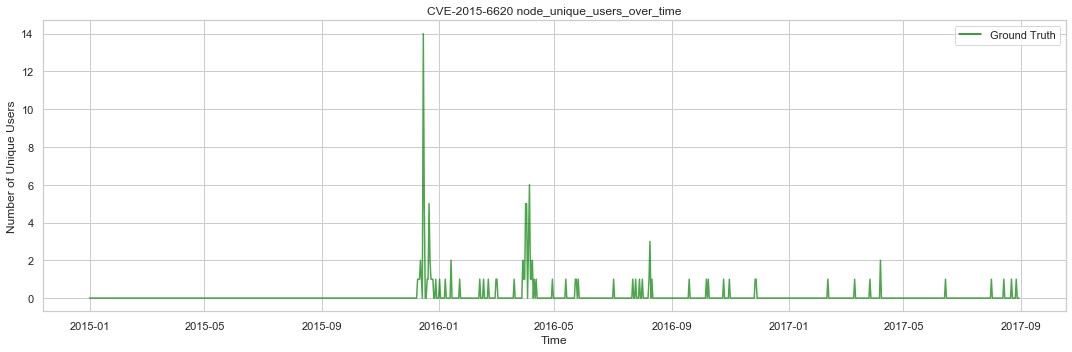

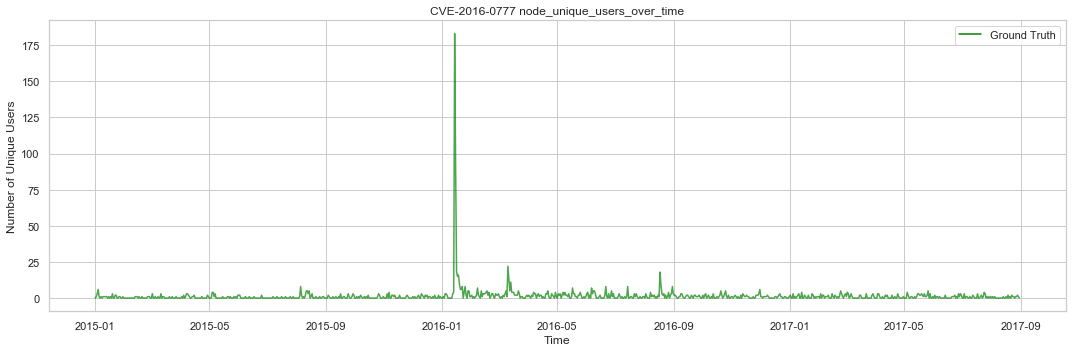

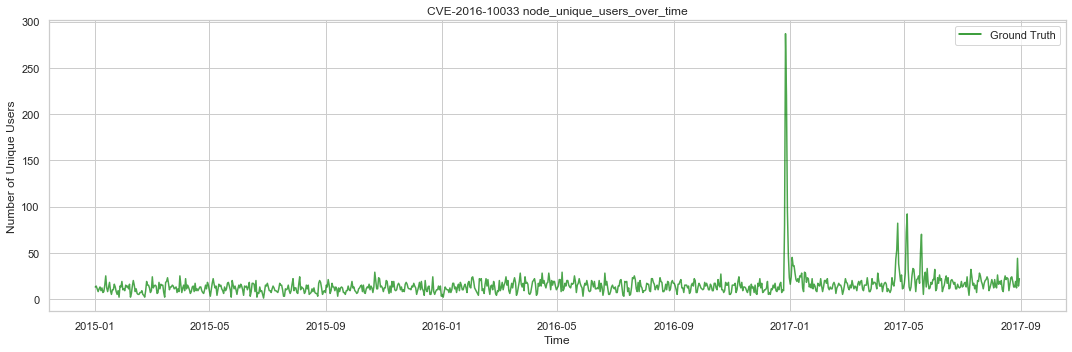

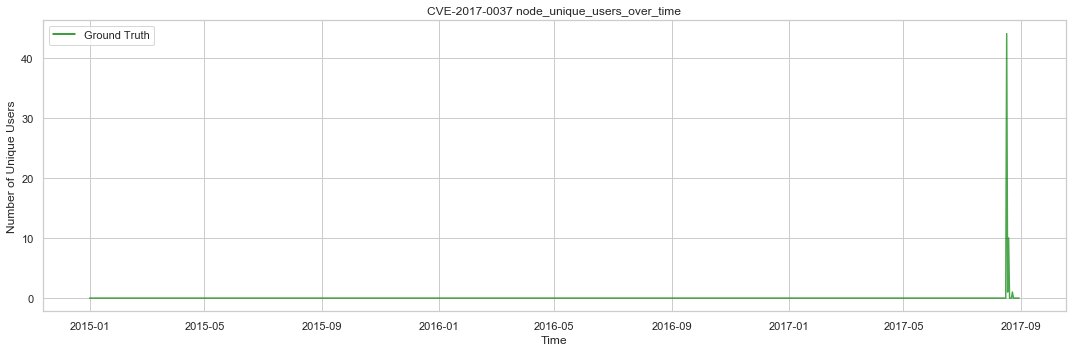

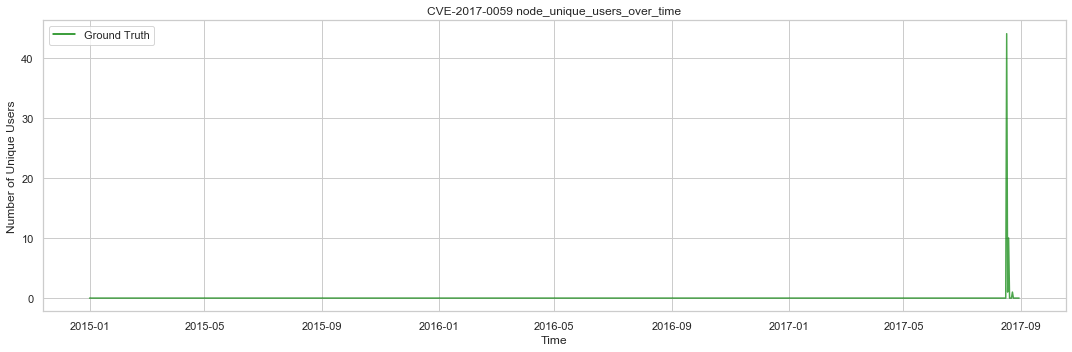

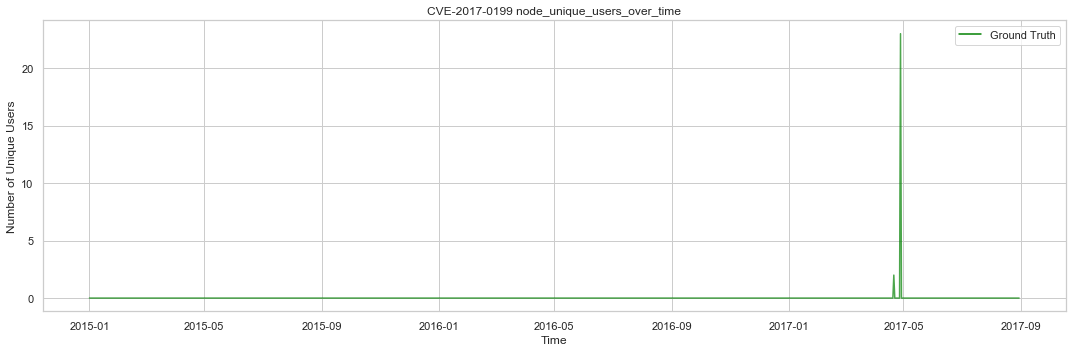

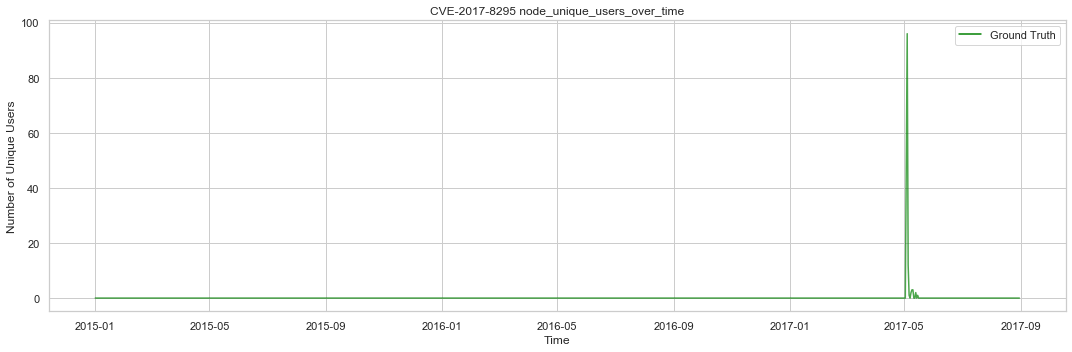

In [17]:
time_series_abs = measurements.unique_users_over_time(delta_t=False,node_level=True)

ss.generate_plot(
    time_series_abs, 
    measurement_name='node_unique_users_over_time',
    show=True
    )

<a id='bonus'></a>

### Bonus Exercise

Given the following dataset related to discussion of several cryptocurrencies, identify which of the cryptocurrencies spreads the fastest and the longest.

In [19]:
#Complete exercise here

dataset_path = '../data/tutorial_multi-platform_bonus.json'
dataset = ss.load_data(dataset_path, verbose=False)

dataset.head()

,actionType,group id,informationID,nodeID,nodeTime,nodeUserID,parentID,platform,rootID
0,message,4,ubiq,1070234717_46,2017-04-22 00:02:26,iwRi7fDg0ccTN8FncyW3sg,1070234717_46,telegram,1070234717_46
1,message,4,ubiq,1070234717_48,2017-04-22 00:03:01,iwRi7fDg0ccTN8FncyW3sg,1070234717_48,telegram,1070234717_48
2,message,4,ubiq,1070234717_51,2017-04-22 00:04:04,iwRi7fDg0ccTN8FncyW3sg,1070234717_51,telegram,1070234717_51
3,message,4,ubiq,1070234717_52,2017-04-22 00:04:08,iwRi7fDg0ccTN8FncyW3sg,1070234717_52,telegram,1070234717_52
4,message,4,ubiq,1070234717_359,2017-04-22 19:52:56,iwRi7fDg0ccTN8FncyW3sg,1070234717_359,telegram,1070234717_359


### Which cryptocurrency spreads the fastest?

### Which cryptocurrency spreads the longest?
